IMPORTING LIBERARIES

In [4]:
pip install numpy pandas tensorflow scikit-learn


ANN MODEL

IMPORT LIBERARIES

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you've loaded the dataset as df
df = pd.read_csv('/content/kanpur.csv')

# Prepare your data
# Selecting relevant features for prediction. You may want to include more based on your analysis.
features = ['DewPointC', 'HeatIndexC', 'WindChillC', 'WindGustKmph',
            'cloudcover', 'humidity', 'precipMM', 'sunHour', 'uvIndex', 'moon_illumination']

X = df[features]
y = df['maxtempC']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ANN MODEL - DEFINE,COMPILE,TRAIN AND EVALUATE

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test_scaled, y_test)

print(f"Test Loss: {test_loss}")


Epoch 1/100
1929/1929 [==============================] - 6s 3ms/step - loss: 49.1510 - val_loss: 3.8796
Epoch 2/100
1929/1929 [==============================] - 4s 2ms/step - loss: 3.3013 - val_loss: 3.0552
Epoch 3/100
1929/1929 [==============================] - 4s 2ms/step - loss: 2.9909 - val_loss: 2.8412
Epoch 4/100
1929/1929 [==============================] - 5s 3ms/step - loss: 2.8847 - val_loss: 2.8764
Epoch 5/100
1929/1929 [==============================] - 4s 2ms/step - loss: 2.8312 - val_loss: 2.8870
Epoch 6/100
1929/1929 [==============================] - 4s 2ms/step - loss: 2.7677 - val_loss: 2.8543
Epoch 7/100
1929/1929 [==============================] - 5s 2ms/step - loss: 2.7424 - val_loss: 2.6797
Epoch 8/100
1929/1929 [==============================] - 4s 2ms/step - loss: 2.7134 - val_loss: 2.6196
Epoch 9/100
1929/1929 [==============================] - 4s 2ms/step - loss: 2.6707 - val_loss: 2.7457
Epoch 10/100
1929/1929 [==============================] - 5s 2ms/step - 

VISUALIZATION

In [32]:
import numpy as np

print("y_test shape:", y_test.shape)
print("predictions shape:", predictions.shape)
print("y_test type:", type(y_test))
print("predictions type:", type(predictions))


y_test shape: (19287,)
predictions shape: (19285, 1)
y_test type: <class 'pandas.core.series.Series'>
predictions type: <class 'numpy.ndarray'>


VISUALIZATION OF ACTUAL AND PREDICTED MAXIMUM TEMPERATURES

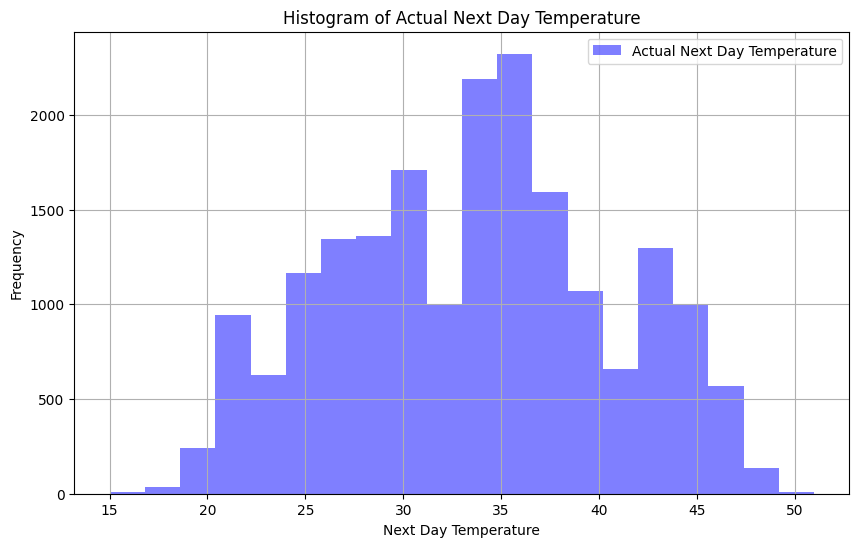

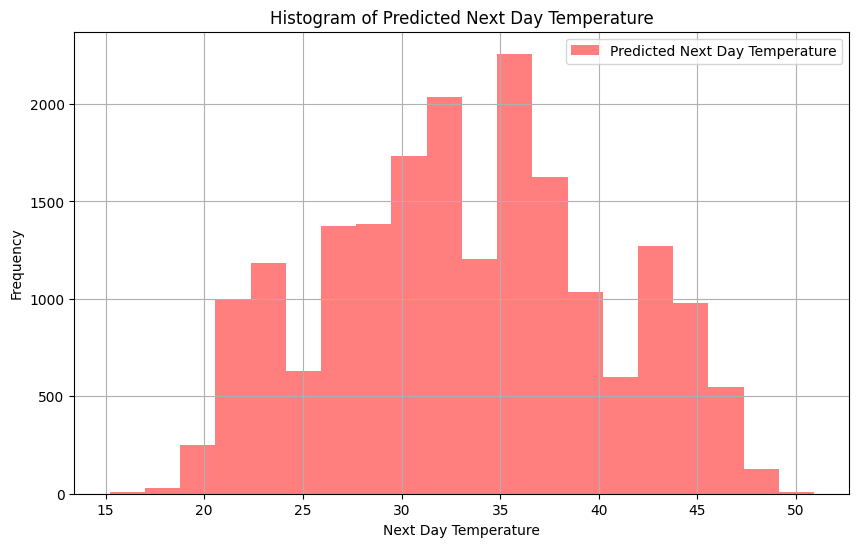

In [37]:
import matplotlib.pyplot as plt

# Create separate histograms for actual and predicted next day temperatures
plt.figure(figsize=(10, 6))

# Plot histogram of actual next day temperatures
plt.hist(y_test_reset_truncated, bins=20, color='blue', alpha=0.5, label='Actual Next Day Temperature')
plt.xlabel('Next Day Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Next Day Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Create separate histogram for predicted next day temperatures
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, color='red', alpha=0.5, label='Predicted Next Day Temperature')
plt.xlabel('Next Day Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Next Day Temperature')
plt.legend()
plt.grid(True)
plt.show()


VISUALIZATION OF COMPARISON OF ACTUAL AND PREDICTED MAX. TEMPERATURES

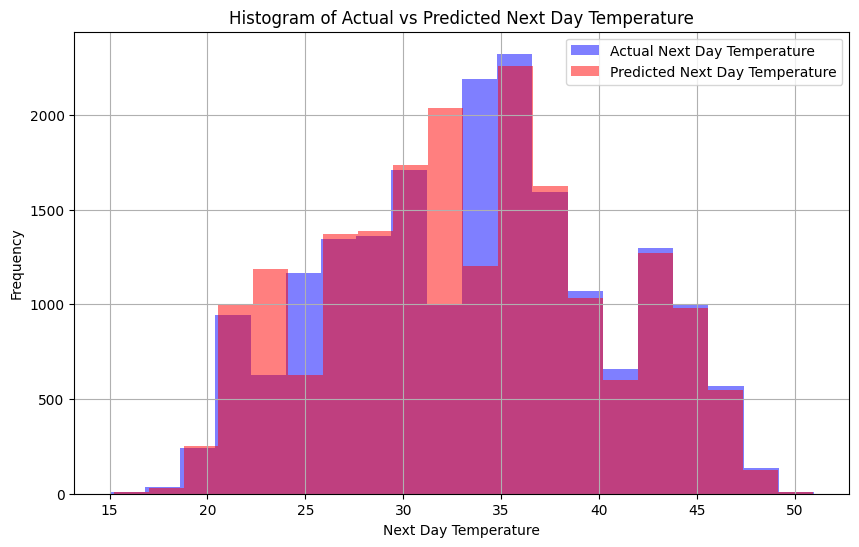

In [36]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of actual next day temperatures
ax.hist(y_test_reset_truncated, bins=20, color='blue', alpha=0.5, label='Actual Next Day Temperature')

# Plot histogram of predicted next day temperatures
ax.hist(predictions, bins=20, color='red', alpha=0.5, label='Predicted Next Day Temperature')

# Set labels and title
ax.set_xlabel('Next Day Temperature')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Actual vs Predicted Next Day Temperature')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()


RNN - LSTM

PREPARE TIME SERIES DATA

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'date_time' and 'maxtempC' are columns in your DataFrame
df.sort_values('date_time', inplace=True)  # Make sure your data is sorted by date
df.reset_index(drop=True, inplace=True)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['maxtempC'].values.reshape(-1,1))

def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Define the time step and create the dataset
time_step = 10  # Number of days to look back to predict the next day's temperature
X, y = create_dataset(scaled_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Splitting dataset into train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BUILD AND TRAIN OF LSTM MODEL

In [9]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)


Epoch 1/100
1206/1206 [==============================] - 29s 16ms/step - loss: 0.0015 - val_loss: 3.8735e-04
Epoch 2/100
1206/1206 [==============================] - 19s 16ms/step - loss: 3.1135e-04 - val_loss: 3.2443e-04
Epoch 3/100
1206/1206 [==============================] - 19s 15ms/step - loss: 1.8696e-04 - val_loss: 2.3774e-04
Epoch 4/100
1206/1206 [==============================] - 19s 16ms/step - loss: 1.4330e-04 - val_loss: 2.7080e-04
Epoch 5/100
1206/1206 [==============================] - 19s 15ms/step - loss: 1.3610e-04 - val_loss: 1.2646e-04
Epoch 6/100
1206/1206 [==============================] - 20s 17ms/step - loss: 1.2823e-04 - val_loss: 1.2193e-04
Epoch 7/100
1206/1206 [==============================] - 18s 15ms/step - loss: 1.2350e-04 - val_loss: 1.2436e-04
Epoch 8/100
1206/1206 [==============================] - 20s 16ms/step - loss: 1.2472e-04 - val_loss: 1.2455e-04
Epoch 9/100
1206/1206 [==============================] - 19s 16ms/step - loss: 1.2307e-04 - val_loss

EVALUATE THE MODEL

In [10]:
# Making predictions
predictions = model.predict(X_test)

# Inversing the scaling
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model - you can use metrics like Mean Absolute Error, Mean Squared Error, or any other relevant metric
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_scaled, predictions)
print(f'Mean Squared Error: {mse}')


603/603 [==============================] - 4s 5ms/step
Mean Squared Error: 0.15393386553832433


VISUALIZATION

VISUALIZATION OF ACTUAL AND PREDICTED MAX. TEMPERATURES

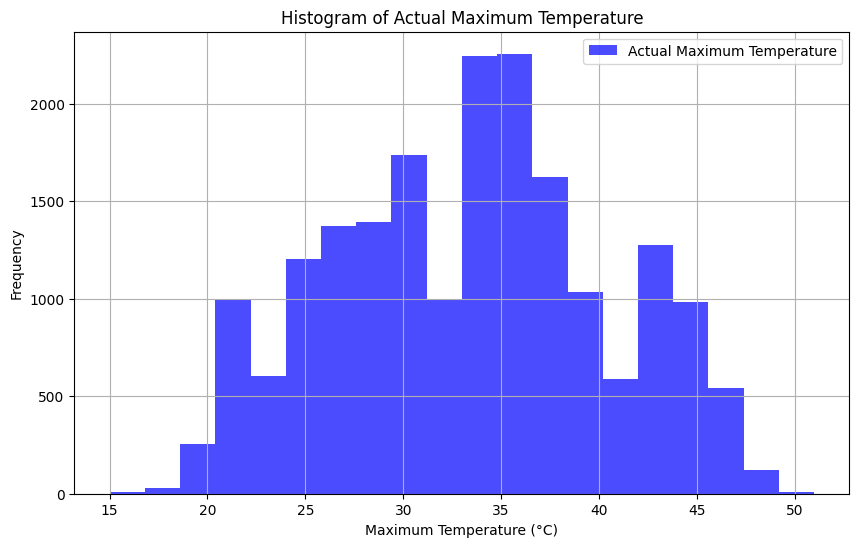

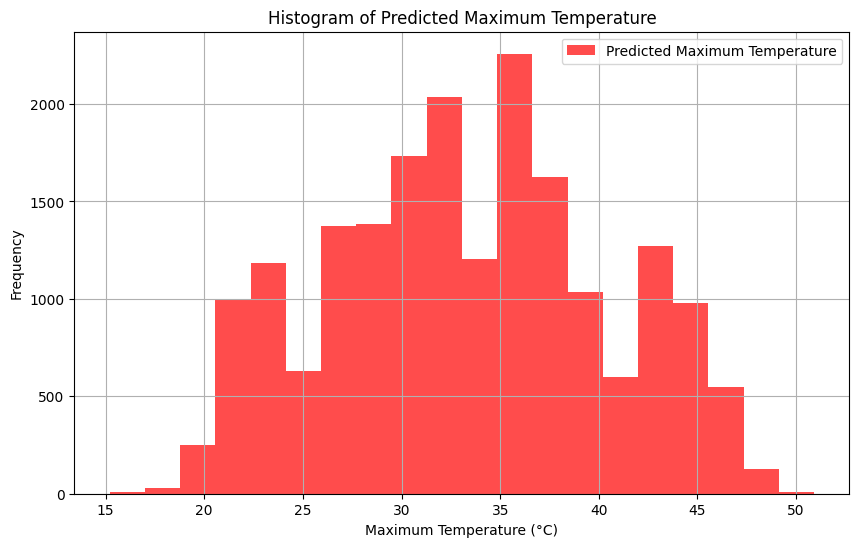

In [20]:
import matplotlib.pyplot as plt

# Plotting histogram of actual maximum temperatures
plt.figure(figsize=(10, 6))
plt.hist(y_test_scaled, bins=20, color='blue', alpha=0.7, label='Actual Maximum Temperature')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Maximum Temperature')
plt.legend()
plt.grid(True)
plt.show()

# Plotting histogram of predicted maximum temperatures
plt.figure(figsize=(10, 6))
plt.hist(predictions, bins=20, color='red', alpha=0.7, label='Predicted Maximum Temperature')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Maximum Temperature')
plt.legend()
plt.grid(True)
plt.show()


COMPARISON OF ACTUAL AND PREDICTED MAX. TEMPERATURE

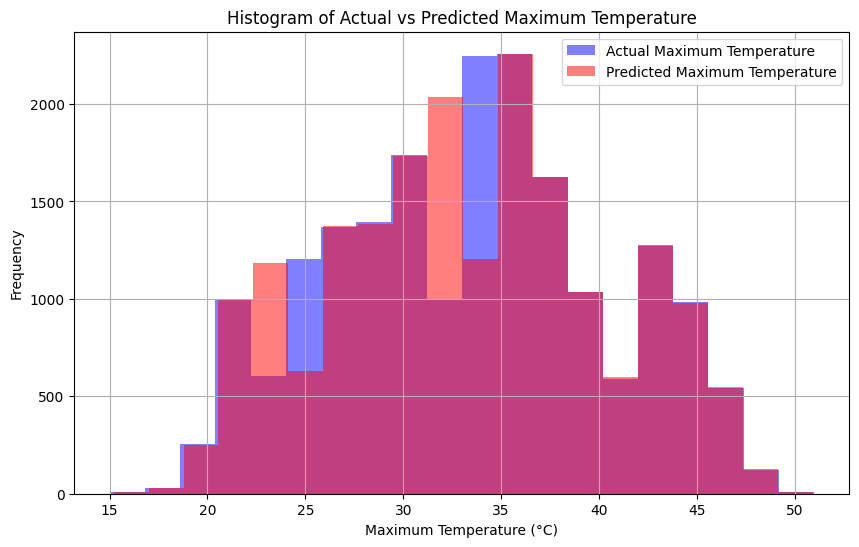

In [21]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram of actual maximum temperatures
ax.hist(y_test_scaled, bins=20, color='blue', alpha=0.5, label='Actual Maximum Temperature')

# Plot histogram of predicted maximum temperatures
ax.hist(predictions, bins=20, color='red', alpha=0.5, label='Predicted Maximum Temperature')

# Set labels and title
ax.set_xlabel('Maximum Temperature (°C)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Actual vs Predicted Maximum Temperature')

# Add legend
ax.legend()

# Show grid
ax.grid(True)

# Show the plot
plt.show()
